# Flood Frequency Estimates for Watershed

**A) See the graph below from USGS 04045500 TAHQUAMENON RIVER NEAR PARADISE, MI for peak annual streamflow**

![](TahquamenonPeakAnnuals.PNG)

**B)Create a graph showing the flood climatology. Plot the streamflow (in cfs) for all peaks that exceed the mean annual flood (MAF) versus the calendar day of the peak (Month/Day). Exclude any historic peak streamflows.**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Mean Annual Flood: 4345.0 cfs 



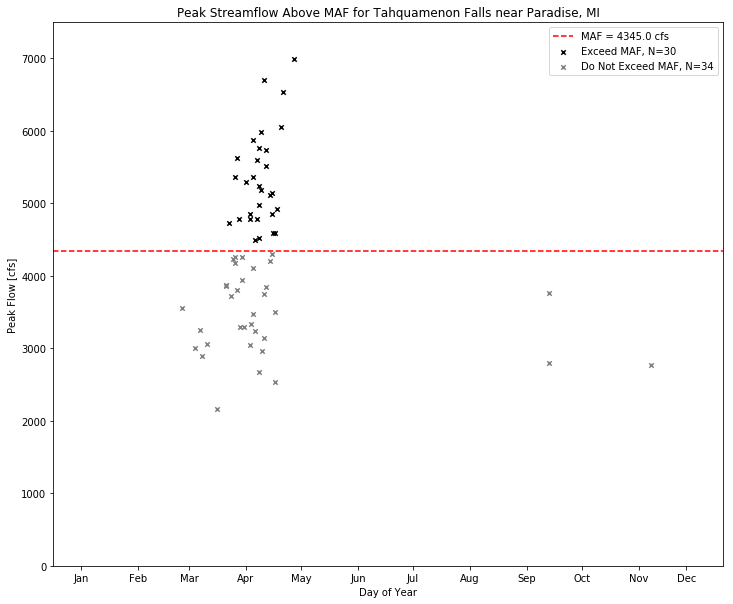

In [131]:
data = pd.read_csv(
    'AnnualPeaks_Tahquamenon.txt',
    sep = '\t',
    skiprows = 69
)

data = pd.concat([data['10d'],data['8s'],data['8s.1']],axis=1)
data.columns = ['Date',"Peak Flow [cfs]","Stage Height [ft]"]

# Manipulate Data to prepare plot
data.Date = pd.to_datetime(data.Date)
data['DayOfYear'] = data['Date'].dt.dayofyear
data = data.set_index(['Date'])

# No historic peaks, all modern
modern = data

# Calculate Mean Annual Flood
MAF = modern['Peak Flow [cfs]'].mean()
print("Mean Annual Flood: " + str(MAF.round()) + " cfs \n")

# Slice for above MAF
FloodExceed = modern[modern['Peak Flow [cfs]'] >= MAF]
NotExceed = modern[modern['Peak Flow [cfs]'] < MAF]

# Scatter Plot by day of year
fig,ax = plt.subplots(figsize=(12,10))
FloodExceed.reset_index().plot.scatter(x='DayOfYear',y='Peak Flow [cfs]',ax=ax,color='k',marker='x')
NotExceed.reset_index().plot.scatter(x='DayOfYear',y='Peak Flow [cfs]',ax=ax,color='gray',marker='x')

ax.set_xlabel('Day of Year')
ax.set_xlim([0,365])
ax.set_ylim([0,7500])
ax.axhline(y=MAF,linestyle='--',color='r')

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ticks = [15,46,74,105,135,166,196,227,258,288,319,345]
plt.xticks(ticks,labels)

plt.legend(
    [
        'MAF = {0} cfs'.format(MAF.round()),
        'Exceed MAF, N={0}'.format(len(FloodExceed)),
        'Do Not Exceed MAF, N={0}'.format(len(NotExceed))
    ]
)
plt.title('Peak Streamflow Above MAF for Tahquamenon Falls near Paradise, MI')

plt.savefig('MAF.png')
plt.show()

**C) Use the USGS PeakFQ program to do a flood frequency analysis. Include a graph showing the output from PeakFQ. Report results for 2-, 10-, and 100- year peak discharge using the 17B estimates.**

Per this publication, https://pubs.er.usgs.gov/publication/wri834194, the Upper Peninsula has a skew of 0.12 and the mean-square error associated with generalized skew on the basis of designated regions is 0.2. Using these values PeakFQ was run with the watstore data.

|  Occurence Interval, Years|  Occurrence  Probability |  Flow [cfs] |
|:-------------------------:|:------------------------:|:-----------:|
| 2                         | 0.5                      | 4,201       |
| 10                        | 0.1                      | 5,894       |
| 100                       | 0.01                     | 7,776       |

![](04045500.PNG)
